In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
!ls

data1.csv  loan_data.csv  sample_data


In [ ]:
data = pd.read_csv('./data1.csv')

In [ ]:
data.head()

,x1,x2,y
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1


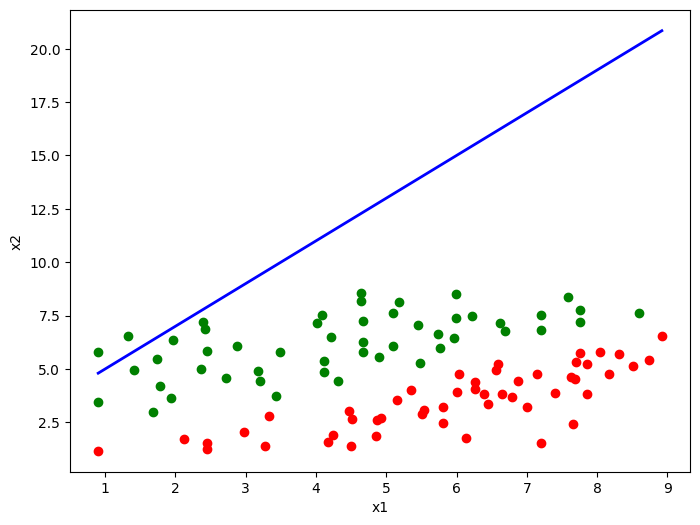

In [ ]:
plt.figure(figsize=(8, 6))

df_1s = data[data["y"]==1]
df_0s = data[data["y"]==0]


plt.scatter(df_1s["x1"],df_1s["x2"],color='red')
plt.scatter(df_0s["x1"],df_0s["x2"],color='green')

x_line = np.linspace(data['x1'].min(), data['x1'].max(), 100)
y_line = 2 * x_line + 3
plt.plot(x_line, y_line, color='blue', linestyle='-', linewidth=2, label='y = 2x + 3')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
V = np.random.uniform(low = -1000, high=1000, size=10)
V_dash = sigmoid(V)
print(f"Range of V_dash: {V_dash.min()}, {V_dash.max()}")

Range of V_dash: 0.0, 1.0


<ipython-input-4-612518146b3f>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [5]:
def hypothesis(theta, X):
    z = np.dot(theta, X)
    if sigmoid(z) >= 0.5:
      return 1
    else:
      return 0

In [6]:
def cost(theta, X, y):
  m = len(y)
  error = 0
  for i in range(-m):
    error += -y[i] * np.log(hypothesis(theta, X[i])) - (1 - y[i]) * np.log(1 - hypothesis(theta, X[i]))
  return error / m

In [50]:
df = pd.read_csv('./loan_data.csv')

# EDA

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
df.shape

(614, 13)

## Notes
Alright, The dataset is decenlty sized with around approx. 600 entries and 12 features. The dataset is mixed, ie; the features are of different type. We will have to use different encoders for each feature.

In [53]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Notes
Checking the number of unique values for each feature.

We will use a **label encoder** for the features with around 2 unique values and they have text data. Credit_History is already binay hence we dont have to encode it.

Applicant INcome Coappicant income and LoanAmount dont have to be encoded, but they will have to be scaled

LoanID is just for ID, hence we can remove it.

A very important thing fact that we can grasp from this is that, this is a binary classification problem (Loan_Status feature is the target feature).

In [54]:
df = df.drop('Loan_ID',axis = 1)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [55]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Notes

Woah, we have some null values. We will now use an imputer to fill in those entries. I could drop them

In [56]:
imputer = SimpleImputer(strategy='most_frequent')
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

In [57]:
#just a sanity check
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Notes
I will be using both Standard and MinMax scalers for this problem. The choice of scaler being used is a simple way to get better results.

In [60]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test)

In [61]:
model = LogisticRegression()
model.fit(X_train_std_scaled, y_train)

LogisticRegression()

In [62]:
y_train_pred = model.predict(X_train_std_scaled)
y_test_pred = model.predict(X_test_std_scaled)

In [63]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_test_pred)
print("Classification Report:\n", cr)

Training Accuracy: 0.80
Test Accuracy: 0.85
Confusion Matrix:
 [[19 16]
 [ 3 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.54      0.67        35
           1       0.84      0.97      0.90        88

    accuracy                           0.85       123
   macro avg       0.85      0.75      0.78       123
weighted avg       0.85      0.85      0.83       123



## Notes

Ok the results arent that good, maybe if we change the scaling technique, we might get better results

In [78]:
#tTrying MinMax
std_scaler = MinMaxScaler()
X_train_mm_scaled = std_scaler.fit_transform(X_train)
X_test_mm_scaled = std_scaler.transform(X_test)

In [79]:
model_mm = LogisticRegression()
model_mm.fit(X_train_std_scaled, y_train)

LogisticRegression()

In [80]:
y_train_pred_mm = model_mm.predict(X_train_mm_scaled)
y_test_pred_mm = model_mm.predict(X_test_mm_scaled)

In [81]:
train_accuracy = accuracy_score(y_train, y_train_pred_mm)
test_accuracy = accuracy_score(y_test, y_test_pred_mm)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred_mm)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_test_pred_mm)
print("Classification Report:\n", cr)

Training Accuracy: 0.68
Test Accuracy: 0.72
Confusion Matrix:
 [[ 0 35]
 [ 0 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.72      1.00      0.83        88

    accuracy                           0.72       123
   macro avg       0.36      0.50      0.42       123
weighted avg       0.51      0.72      0.60       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Notes

Clearly the Standard Scaler is more suitable. Hence will be considering that moving forward.

In [71]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def hypothesis(self, theta, X):
        return self.sigmoid(np.dot(X, theta))

    def cost_function(self, theta, X, y):
        m = len(y)
        h = self.hypothesis(theta, X)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.num_iterations):
            gradient = (1 / m) * np.dot(X.T, self.hypothesis(self.theta, X) - y)
            self.theta -= self.learning_rate * gradient
        return self

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.gradient_descent(X, y)
        return self

    def predict_prob(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.hypothesis(self.theta, X)

    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold).astype(int)

In [72]:
custom_model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
custom_model.fit(X_train_std_scaled, y_train)

In [74]:
y_train_pred_custom = custom_model.predict(X_train_std_scaled)
y_test_pred_custom = custom_model.predict(X_test_std_scaled)

In [77]:
train_accuracy_custom = accuracy_score(y_train, y_train_pred_custom)
test_accuracy_custom = accuracy_score(y_test, y_test_pred_custom)

print(f"Training Accuracy: {train_accuracy_custom:.2f}")
print(f"Test Accuracy: {test_accuracy_custom:.2f}")

cm = confusion_matrix(y_test, y_test_pred_custom)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_test_pred_custom)
print("Classification Report:\n", cr)

Training Accuracy: 0.80
Test Accuracy: 0.85
Confusion Matrix:
 [[19 16]
 [ 3 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.54      0.67        35
           1       0.84      0.97      0.90        88

    accuracy                           0.85       123
   macro avg       0.85      0.75      0.78       123
weighted avg       0.85      0.85      0.83       123



# ROC CURVE COMPARISON

In [87]:
custom_probs = custom_model.predict_prob(X_test_std_scaled)
custom_probs

array([0.66369465, 0.80451197, 0.78548386, 0.72788397, 0.1608353 ,
       0.78994037, 0.77680165, 0.13182438, 0.72610158, 0.72833763,
       0.76253685, 0.72516444, 0.72741149, 0.7046359 , 0.78137071,
       0.82134162, 0.79649408, 0.78477088, 0.79384854, 0.12646375,
       0.67000005, 0.75472902, 0.18176529, 0.16915777, 0.61473924,
       0.63365618, 0.74876857, 0.12979761, 0.15817159, 0.83806346,
       0.71859376, 0.69753125, 0.79361589, 0.15106934, 0.76117733,
       0.70437256, 0.75631204, 0.68392616, 0.83072865, 0.76174739,
       0.15053715, 0.79594567, 0.72975486, 0.12729635, 0.08106799,
       0.76567969, 0.17201656, 0.65711153, 0.79436208, 0.79090614,
       0.59364225, 0.69368569, 0.66105017, 0.75733154, 0.79892644,
       0.74944794, 0.67220831, 0.75195332, 0.77391593, 0.78184577,
       0.75884981, 0.08178717, 0.1733852 , 0.78751894, 0.77657927,
       0.73051748, 0.79731504, 0.68480909, 0.75452897, 0.8034667 ,
       0.80529482, 0.77399938, 0.67137222, 0.7990642 , 0.70926

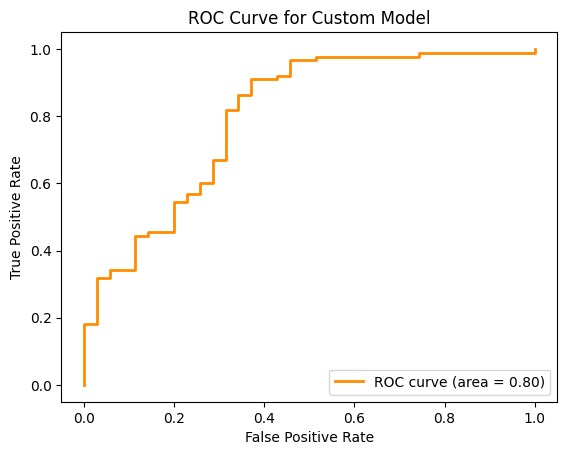

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, custom_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Custom Model')
plt.legend(loc='lower right')
plt.show()

In [90]:
model_probs = model.predict_proba(X_test_std_scaled)
model_probs

array([[0.35577038, 0.64422962],
       [0.14722624, 0.85277376],
       [0.1529182 , 0.8470818 ],
       [0.22057844, 0.77942156],
       [0.92896049, 0.07103951],
       [0.17162693, 0.82837307],
       [0.1660599 , 0.8339401 ],
       [0.94301275, 0.05698725],
       [0.23124601, 0.76875399],
       [0.23459382, 0.76540618],
       [0.22639615, 0.77360385],
       [0.24057861, 0.75942139],
       [0.23919218, 0.76080782],
       [0.26194996, 0.73805004],
       [0.18025653, 0.81974347],
       [0.12321742, 0.87678258],
       [0.15741817, 0.84258183],
       [0.17940159, 0.82059841],
       [0.16025984, 0.83974016],
       [0.94571493, 0.05428507],
       [0.33382605, 0.66617395],
       [0.21345653, 0.78654347],
       [0.90081139, 0.09918861],
       [0.91447465, 0.08552535],
       [0.39179909, 0.60820091],
       [0.36563611, 0.63436389],
       [0.22085516, 0.77914484],
       [0.9401801 , 0.0598199 ],
       [0.92056964, 0.07943036],
       [0.10412243, 0.89587757],
       [0.

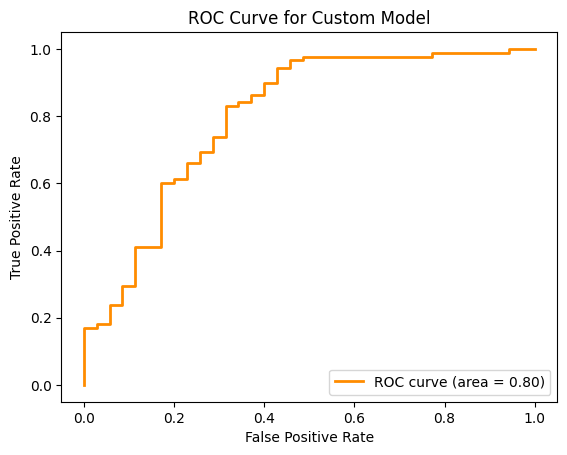

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, model_probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Custom Model')
plt.legend(loc='lower right')
plt.show()

# CONCLUSIONS

Both the in-built and custom models have the same performance. This includes all the metrics like accuracy, precisoin, recall and the ROC-AUC curves